# Obtendo a base de dados
https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
Data_base = pd.read_csv('/content/CC GENERAL.csv')

In [ ]:
Data_base.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Tratando a base de dados

In [ ]:
Data_base.drop(columns=['CUST_ID','TENURE'],inplace=True)

In [ ]:
nulos = Data_base.isna().sum()
nulos

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [ ]:
Data_base.fillna(Data_base.median(),inplace=True)

In [ ]:
nulos = Data_base.isna().sum()
nulos

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [ ]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(Data_base.values)
values

array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
Kmeans = KMeans(n_clusters=5,n_init=10,max_iter=300)
y_pred = Kmeans.fit_predict(values)

In [ ]:
y_pred
Kmeans.labels_

array([1, 0, 1, ..., 1, 1, 3], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
labels = Kmeans.labels_
silhouette = silhouette_score(values,labels,metric='euclidean')
silhouette

0.3646017628085195

In [ ]:
dbs = davies_bouldin_score(values,labels)
dbs

1.0753510081923618

In [ ]:
calinski = calinski_harabasz_score(values,labels)
calinski

3431.783254564093

In [ ]:
def clustering_algorithm(n_clusters,dataset):
  kmeans = KMeans(n_clusters=n_clusters,n_init=10,max_iter=300)
  labels = kmeans.fit_predict(dataset)
  s = silhouette_score(dataset,labels,metric='euclidean')
  dbs = davies_bouldin_score(dataset,labels)
  calinski = calinski_harabasz_score(dataset,labels)
  return s,dbs,calinski

In [ ]:
s1, dbs1, calinski1 = clustering_algorithm(3,values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088426 3526.440519908274


In [ ]:
s2, dbs2, calinski2 = clustering_algorithm(5,values)
print(s2, dbs2, calinski2)

0.36454314826693845 1.075812734747931 3431.800540734652


In [ ]:
s3, dbs3, calinski3 = clustering_algorithm(20,values)
print(s3, dbs3, calinski3)

0.2913689833162277 1.2100189750583143 2395.771540905102


In [ ]:
import numpy as np

In [ ]:
Data_base.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [ ]:
random_data = np.random.rand(len(Data_base),len(Data_base.columns))

s, dbs, calinski = clustering_algorithm(5,random_data)
print(s, dbs, calinski)

0.039757426992215926 3.4862237276523977 301.4669132965488


In [ ]:
set1,set2,set3 = np.array_split(values,3)
s1, dbs1, calinski1 = clustering_algorithm(5,set1)
s2, dbs2, calinski2 = clustering_algorithm(5,set2)
s3, dbs3, calinski3 = clustering_algorithm(5,set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.36902833724156275 1.0555134663444672 1204.1099841184937
0.3538212950180423 1.139783250125324 1194.9347803314336
0.3668564117315988 1.0993525253456347 1167.5313082261505


Text(0, 0.5, 'Valor total gasto')

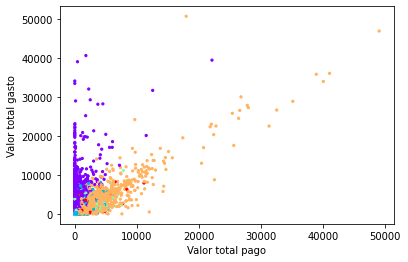

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(Data_base['PURCHASES'],Data_base['PAYMENTS'],c = labels,s=5,cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')


In [ ]:
import seaborn as sns
Data_base['cluster'] = labels
sns.pairplot(Data_base[0:],hue='cluster')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Data_base.groupby('cluster').describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1073.0  1795.941069  1982.629330   0.000000   507.076999   
1        3280.0   443.746756   846.398201   0.000000    23.365333   
2        2651.0  3036.509818  2478.358491   6.824905  1257.895616   
3        1538.0  1142.833592  1663.943440   0.000000   212.513230   
4         408.0  1990.318603  1860.968409  70.794108  1016.567882   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0        1088.056301  2320.402196  14581.459140            1073.0  0.862241   
1          82.941478   410.126095   9630.367575            3280.0  0.774389   
2        2171.222526  4223.849965  18495.558550            2651.0  0.963809   
3         555.745265  1371.943854  19043.138560            1538.0  0.928255   
4        1326.681742  2149.639085  11670.179850             408.0  0.989409   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       886.322345  21235.065300           1073.0  0.117326   
1        ...       248.733727   4483.503862           3280.0  0.246806   
2        ...      1330.279644   8345.641905           2651.0  0.001798   
3        ...       524.765832  18621.013310           1538.0  0.278041   
4        ...      7184.162991  76406.207520            408.0  0.019460   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.186807  0.0  0.0  0.083333  0.142857  1.0  
1        0.346748  0.0  0.0  0.000000  0.444444  1.0  
2        0.023251  0.0  0.0  0.000000  0.000000  0.6  
3        0.366991  0.0  0.0  0.083333  0.545455  1.0  
4        0.091220  0.0  0.0  0.000000  0.000000  1.0  

[5 rows x 128 columns]

In [ ]:
centroids = Kmeans.cluster_centers_
print(centroids)
print(centroids.shape)

[[2.35406845e-01 2.16498382e-04 6.02264552e-02 3.41509957e-02
  2.60806692e-02 4.00065289e-01 5.27340033e-05 2.05029610e-05
  3.53109634e-05 6.54896978e-05 1.57112716e-03 1.12401656e-03
  5.35394449e-01 5.97651725e-01 1.04510986e-01 2.77279840e-05]
 [6.91003939e-02 2.30735820e-04 1.21488582e-01 4.79706676e-02
  7.36181130e-02 2.44793374e-02 1.72814707e-04 3.36627014e-05
  1.40285541e-04 7.93816793e-06 1.25005935e-04 2.86309441e-03
  9.43533996e-01 1.53766191e-01 5.68572256e-02 7.61261275e-05]
 [5.04526580e-01 2.72332745e-04 6.20171708e-02 3.64414607e-02
  2.55974069e-02 2.52329514e-01 6.75600478e-05 2.58663568e-05
  4.51550497e-05 5.73437494e-05 1.15422756e-03 1.33589087e-03
  7.18989200e-01 1.66362861e-01 1.79601509e-01 5.51886878e-07]
 [1.60196193e-01 2.45138271e-04 4.38524353e-01 2.57188026e-01
  1.81507838e-01 2.60235369e-02 2.04267661e-04 8.89991734e-05
  1.50483568e-04 9.39554416e-06 1.70326014e-04 6.17085618e-03
  6.03525832e-01 4.02709673e-01 8.56313254e-02 7.18569916e-05]
 [3.

In [ ]:
max = len(centroids[0])
for i in range(max):
  print(Data_base.columns.values[i],f"\n{centroids[:,i].var():.4f}")

BALANCE 
0.0223
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0197
ONEOFF_PURCHASES 
0.0077
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0225
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0362
PAYMENTS 
0.0279
MINIMUM_PAYMENTS 
0.0549
PRC_FULL_PAYMENT 
0.0000


In [ ]:
description = Data_base.groupby('cluster')['BALANCE','PURCHASES','CASH_ADVANCE','CREDIT_LIMIT','PAYMENTS']
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1795.941069,472.310373,3266.709902,3980.122285,4704.852542,1073
1,443.746756,629.249107,141.482978,5130.547795,814.294226,3280
2,3036.509818,385.376134,1634.262935,4493.115805,968.393476,2651
3,1142.833592,3274.948693,186.045097,4098.218564,3041.872720,1538
4,1990.318603,856.504755,424.225892,2231.985294,1340.280120,408


A ordem dos clusters pode estar invertida aqui, porém não tem problema, cada linha vai representar um cluster diferente.

CLUSTER 0: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 1: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhores pagadores.

CLUSTER 3: Clientes que gastam muito com saques. Pagam as vezes.

CLUSTER 4: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

In [ ]:
Data_base.groupby("cluster")["PRC_FULL_PAYMENT"].describe()